# Introduction: Analyzing Factors Affecting Cardiovascular Disease Prevalence in England

## 1. Context and Problem Statement
Cardiovascular Disease (CVD) remains a leading cause of morbidity and mortality worldwide, presenting a significant public health challenge in the UK. Understanding the socio-environmental determinants of CVD prevalence at a local level is crucial for effective resource allocation and targeted policy intervention by local authorities.

This study utilizes publicly available local area statistics from the UK Office for National Statistics (ONS) to investigate the extent to which key socio-analytic factors—specifically poverty, lifestyle choices (smoking and overweight rates), and general population wellbeing—are associated with the reported prevalence of CVD across local authority regions in England.

## 2. Research Objectives
The primary objective of this project is to quantify and statistically evaluate the influence of the four socio-analytic factors on CVD prevalence. The specific aims are:

To perform exploratory data analysis (EDA) to understand the distribution, central tendency, and initial correlations between all variables.

To build a Multiple Linear Regression (MLR) model to determine the unique and isolated effect of each factor on CVD prevalence, controlling for other variables.

To perform model diagnostics (e.g., checking for multicollinearity and non-linearity) to ensure the stability and reliability of the statistical estimates.

To specifically visualize and analyze the complex relationship between Poverty and CVD prevalence, providing evidence-based insights for policy makers.

## 3. Methodology and Structure
The analysis follows a standard quantitative methodology: data cleaning and preparation, exploratory analysis (correlation and distribution checks), advanced statistical modeling (MLR and Categorical Regression), and rigorous model validation. Both NHST and estimation approaches were applied, with results reported floowoing standard statstical reporting conventions


## Data dictionary 
|Variable| Data Type| Description| 
|----|----|----|
|area_name| Categorical| Name of the lacal authority region|
|area_code|Categorical|Unique identifier for tthe local authority region|
|Population|Integer|Total population of the area|
|proverty|Numeric|percentage of people in the area who meet the definition of living in proverty|
|CVD| Numeric|Percentage of people in the area who have recently experienced Cardiovascular Disease(CVD)|
|overweight|Numeric| percentage of the people in the area classified as overweight|
|somkers|Numeric|percentage of people in the area who smoke|
|wellbeing|Numeric|average wellbeing score of people living in the area|



In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------

df = pd.read_csv("Cardio_Vascular_Disease.csv")
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_name   385 non-null    object 
 1   area_code   385 non-null    object 
 2   Population  309 non-null    float64
 3   Poverty     309 non-null    float64
 4   CVD         309 non-null    float64
 5   overweight  313 non-null    float64
 6   smokers     378 non-null    float64
 7   wellbeing   370 non-null    float64
dtypes: float64(6), object(2)
memory usage: 24.2+ KB


,Population,Poverty,CVD,overweight,smokers,wellbeing
count,3.090000e+02,309.000000,309.000000,313.000000,378.000000,370.000000
mean,1.748044e+05,19.340453,12.423948,25.521571,13.073545,7.422811
std,1.161093e+05,3.462313,2.168280,5.585269,3.756302,0.232264
min,1.960000e+03,12.900000,7.900000,10.243200,3.200000,6.610000
25%,1.006400e+05,16.900000,10.900000,21.634400,10.725000,7.280000
50%,1.352750e+05,18.700000,12.300000,25.518410,12.800000,7.410000
75%,2.166000e+05,21.400000,14.100000,29.458070,15.300000,7.560000
max,1.056970e+06,30.700000,17.800000,40.216330,27.800000,8.170000


In [5]:

#  Check Missing and Duplicate Rows (R: colSums(is.na), sum(duplicated) equivalents)
print("\n--- Missing Values Count per Variable ---")
print(df.isnull().sum()) 

print("\n--- Duplicate Rows Count ---")
print(df.duplicated().sum()) 

# Remove rows where Population, Poverty, CVD, and overweight are ALL NA
initial_rows = len(df)
df_cleaned = df.loc[~(df['Population'].isna() & 
                      df['Poverty'].isna() & 
                      df['CVD'].isna() & 
                      df['overweight'].isna())].copy()

print(f"\n--- 2A. Removed rows where all key variables are NA ---")
print(f"Rows before removal: {initial_rows}")
print(f"Rows after removal: {len(df_cleaned)}")
# Impute remaining NAs in specific columns with the mean of that column
cols_to_impute = ['Population', 'smokers', 'wellbeing', 'Poverty', 'overweight']

for col in cols_to_impute:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

print(f"\n--- 2B. Mean Imputation of Remaining NAs Completed ---")
print(df_cleaned[cols_to_impute].isnull().sum()) # Verify that NAs are 0 for these columns

# Finally, remove rows where the dependent variable (CVD) is missing
before_cvd_filter = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=['CVD'])

print(f"\n--- 2C. Rows with NA in CVD Removed ---")
print(f"Rows before CVD NA removal: {before_cvd_filter}")
print(f"Rows after CVD NA removal: {len(df_cleaned)}")

# Final verification of all missing values and dimension comparison 
print("\n--- 3. Final Missing Value Verification ---")
print(df_cleaned.isnull().sum())

print(f"\n--- Final Data Dimension Comparison ---")
print(f"Original Data Rows: {len(df)}")
print(f"Cleaned Data Rows: {len(df_cleaned)}")

print("\n--- Final Cleaned Data Summary Statistics ---")
print(df_cleaned.describe())


--- Missing Values Count per Variable ---
area_name      0
area_code      0
Population    76
Poverty       76
CVD           76
overweight    72
smokers        7
wellbeing     15
dtype: int64

--- Duplicate Rows Count ---
0

--- 2A. Removed rows where all key variables are NA ---
Rows before removal: 385
Rows after removal: 313

--- 2B. Mean Imputation of Remaining NAs Completed ---
Population    0
smokers       0
wellbeing     0
Poverty       0
overweight    0
dtype: int64

--- 2C. Rows with NA in CVD Removed ---
Rows before CVD NA removal: 313
Rows after CVD NA removal: 309

--- 3. Final Missing Value Verification ---
area_name     0
area_code     0
Population    0
Poverty       0
CVD           0
overweight    0
smokers       0
wellbeing     0
dtype: int64

--- Final Data Dimension Comparison ---
Original Data Rows: 385
Cleaned Data Rows: 309

--- Final Cleaned Data Summary Statistics ---
         Population     Poverty         CVD  overweight     smokers  \
count  3.090000e+02  309.

To ensure the integrity of the data, rows with more than three missing values, especially those where CVD data was missing, were removed. For the remainging missing values, they were replaced with the mean of the respective columns. This approach was taken to improve the reliability of the dataset. Total of 73 rows were removed during the data cleaning process.

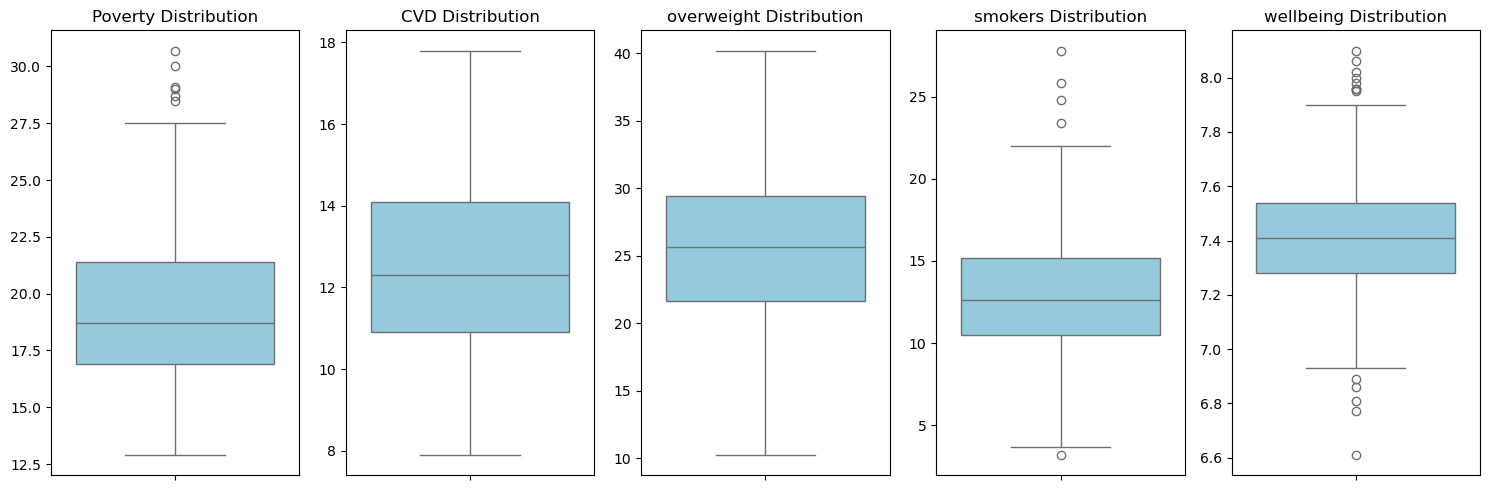

In [11]:
# Check outlier

variables_to_plot = ['Poverty', 'CVD', 'overweight', 'smokers', 'wellbeing']

plt.figure(figsize=(15, 5)) 

for i, var in enumerate(variables_to_plot):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=df_cleaned[var], color='skyblue') 
    plt.title(f'{var} Distribution', fontsize=12)
    plt.ylabel('') 

plt.tight_layout()
plt.show()

In [12]:
# Calculate correlation between the dependent variable (CVD) and key independent variables

independent_vars = ['overweight', 'smokers', 'wellbeing', 'Poverty']

# Create a DataFrame containing only the relevant variables
corr_df = df_cleaned[['CVD'] + independent_vars]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Extract correlations with CVD
cvd_correlations = correlation_matrix.loc['CVD', independent_vars]

print("\n--- Correlation between CVD and Independent Variables ---")
print(cvd_correlations)


--- Correlation between CVD and Independent Variables ---
overweight    0.316367
smokers       0.161967
wellbeing     0.241173
Poverty      -0.243478
Name: CVD, dtype: float64


The boxplots were used to identify outliers, aand these outliers were not removed. This decision was made because the independent variables could reflect important characteristics that are valuable for the analysis and should not be discarded.


The correlation analysis between CVD and other factors revealed the following results: Overweight: 0.316 (moderate positive correlation with CVD) Smokers: 0.162 (weak positive correlation with CVD) Wellbeing: 0.241 (weak positive correlation with CVD) Poverty: -0.244 (weak negative correlation with CVD) These results suggest that while all factors are related to CVD, and among the factors, overweight shows the strongest positive correlation with CVD. 

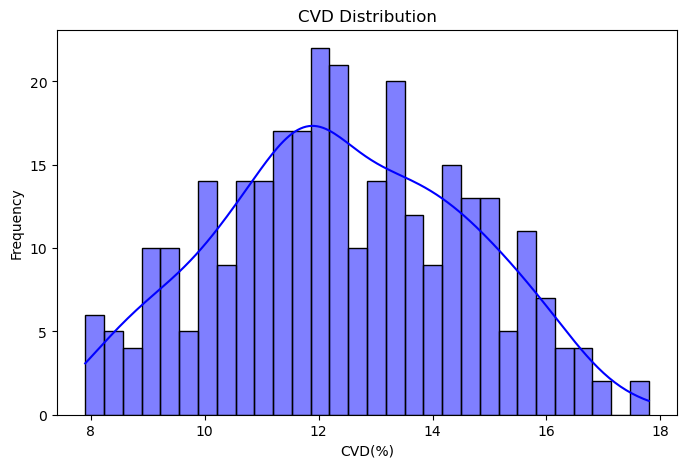

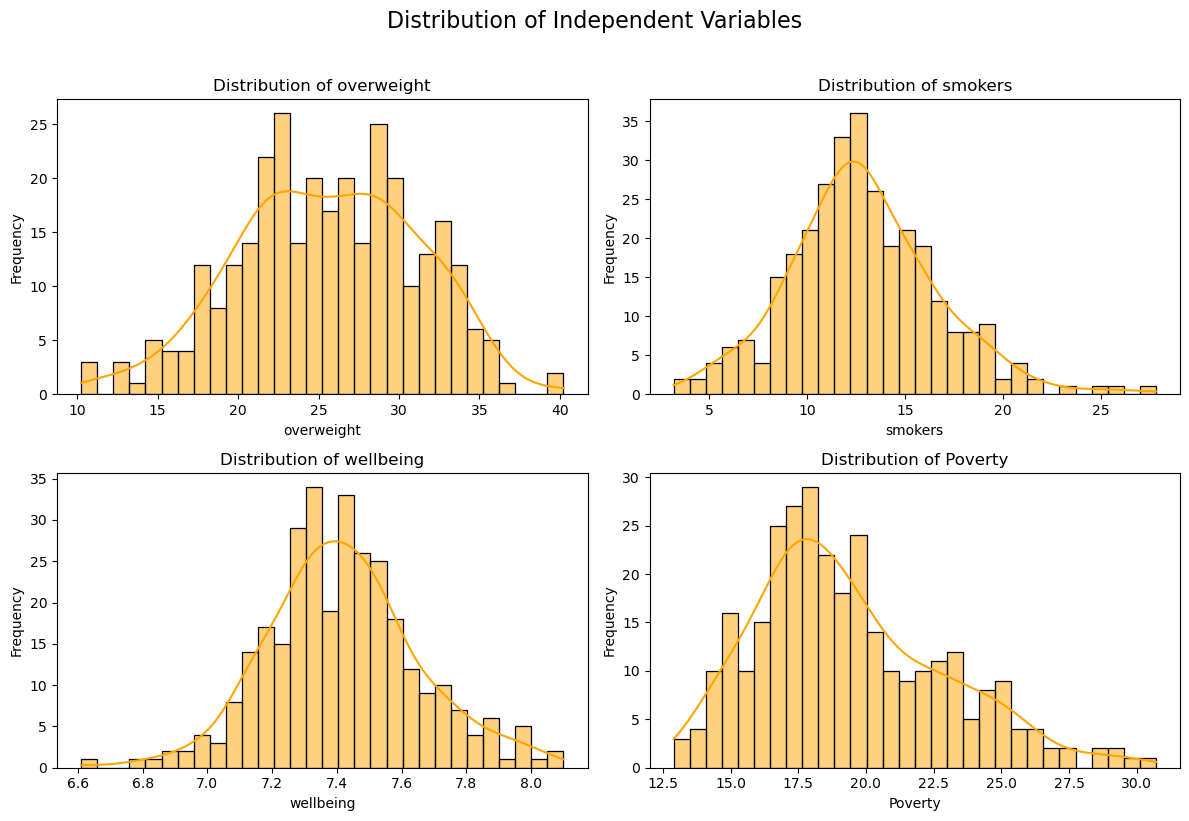

In [15]:
# Visualization 
# visualize the distribution of the CVD percentage 
plt.figure(figsize=(8,5))
sns.histplot(data=df_cleaned, x='CVD', bins=30,kde=True, color='blue')
plt.title('CVD Distribution')
plt.xlabel('CVD(%)')
plt.ylabel('Frequency')
plt.show

# Visualize the distribution of independent variables using facet wrap style
independent_vars = ["overweight", "smokers", "wellbeing", "Poverty"]

# Set up the plotting grid (2 rows, 2 columns)
plt.figure(figsize=(12, 8)) 

for i, var in enumerate(independent_vars):
    plt.subplot(2, 2, i + 1)
    # Histograms with Kernel Density Estimate (KDE) for smoothing
    sns.histplot(data=df_cleaned, x=var, bins=30, kde=True, color='orange')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

plt.suptitle("Distribution of Independent Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

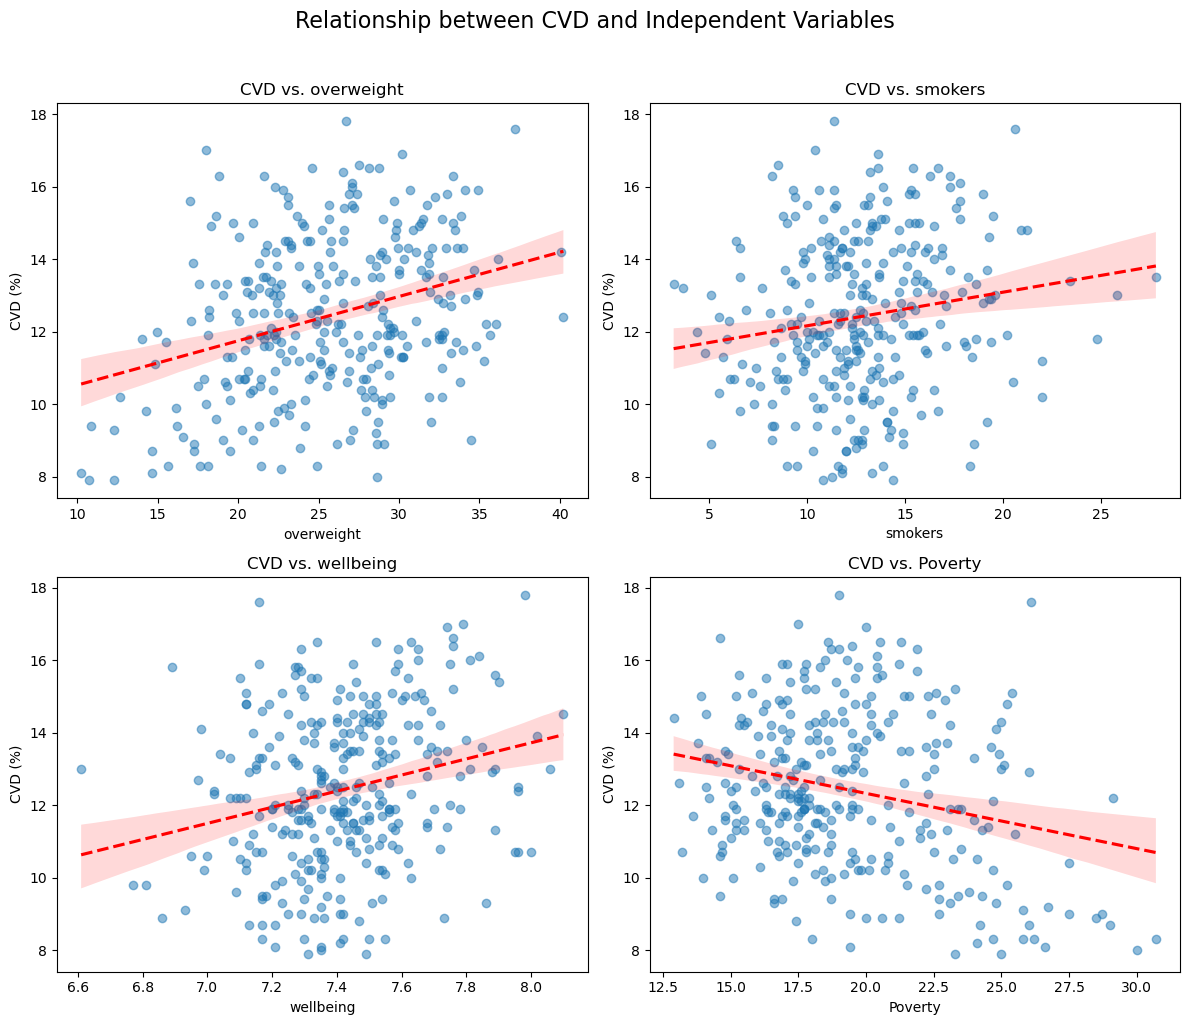

In [17]:
# Create scatter plots to visualize the relationship between CVD and independent variables

# Set up the plotting grid (2 rows, 2 columns)
plt.figure(figsize=(12, 10)) 

for i, var in enumerate(independent_vars):
    plt.subplot(2, 2, i + 1)
    
    # Scatter plot with linear regression line
    # alpha=0.5 for point transparency
    sns.regplot(data=df_cleaned, x=var, y='CVD', 
                scatter_kws={'alpha':0.5}, 
                line_kws={'color':'red', 'linestyle':'--'})
    
    plt.title(f"CVD vs. {var}")
    plt.xlabel(var)
    plt.ylabel("CVD (%)")

plt.suptitle("Relationship between CVD and Independent Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

The histograms of CVD percentages and independent variables (overweight, smokers, wellbeing, and poverty) reveal their distributions across the dataset. The CVD distribution appears roughly normal, but some independent variables show skewness, which may require transformations for better modeling. Understanding these distributions is important for evaluating whether the data follows a normal or skewness distribution. However,in regression analysis, while not all variables need to be normally distributed, it is crucial that the residuals follow a normal distribution. This will be further assessed in the regression analysis steps.



Scatter Plots and Regression Relationship The scatter plots show the relationships between the independent variables and CVD, indicating the strength and direction of these relationships using regression lines. There is a positive relationship between CVD and overweight, smokers, and wellbeing, while a negative relationship is observed with poverty

In [35]:
# Identifying which of factors affect the prevalence of CVD in an area
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Fit the MLR model (CVD as dependent variable)
model_formula = 'CVD ~ Poverty + smokers +wellbeing + overweight'
lm_cvd_multi = sm.ols(formula=model_formula, data=df_cleaned).fit()

# Print summary, confidence intervals, and VIF
print("--- Multiple Linear Regression (MLR) Summary ---")
print(lm_cvd_multi.summary())

print("\n--- 95% Confidence Intervals ---")
print(lm_cvd_multi.conf_int())

# VIF calculation for multicollinearity check
features = ['Poverty', 'smokers', 'wellbeing', 'overweight']
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data
vif_results = calculate_vif(df_cleaned.dropna(), features)
print("\n--- Variance Inflation Factor (VIF) ---")
print(vif_results)

--- Multiple Linear Regression (MLR) Summary ---
                            OLS Regression Results                            
Dep. Variable:                    CVD   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     23.89
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.37e-17
Time:                        18:27:39   Log-Likelihood:                -634.86
No. Observations:                 309   AIC:                             1280.
Df Residuals:                     304   BIC:                             1298.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

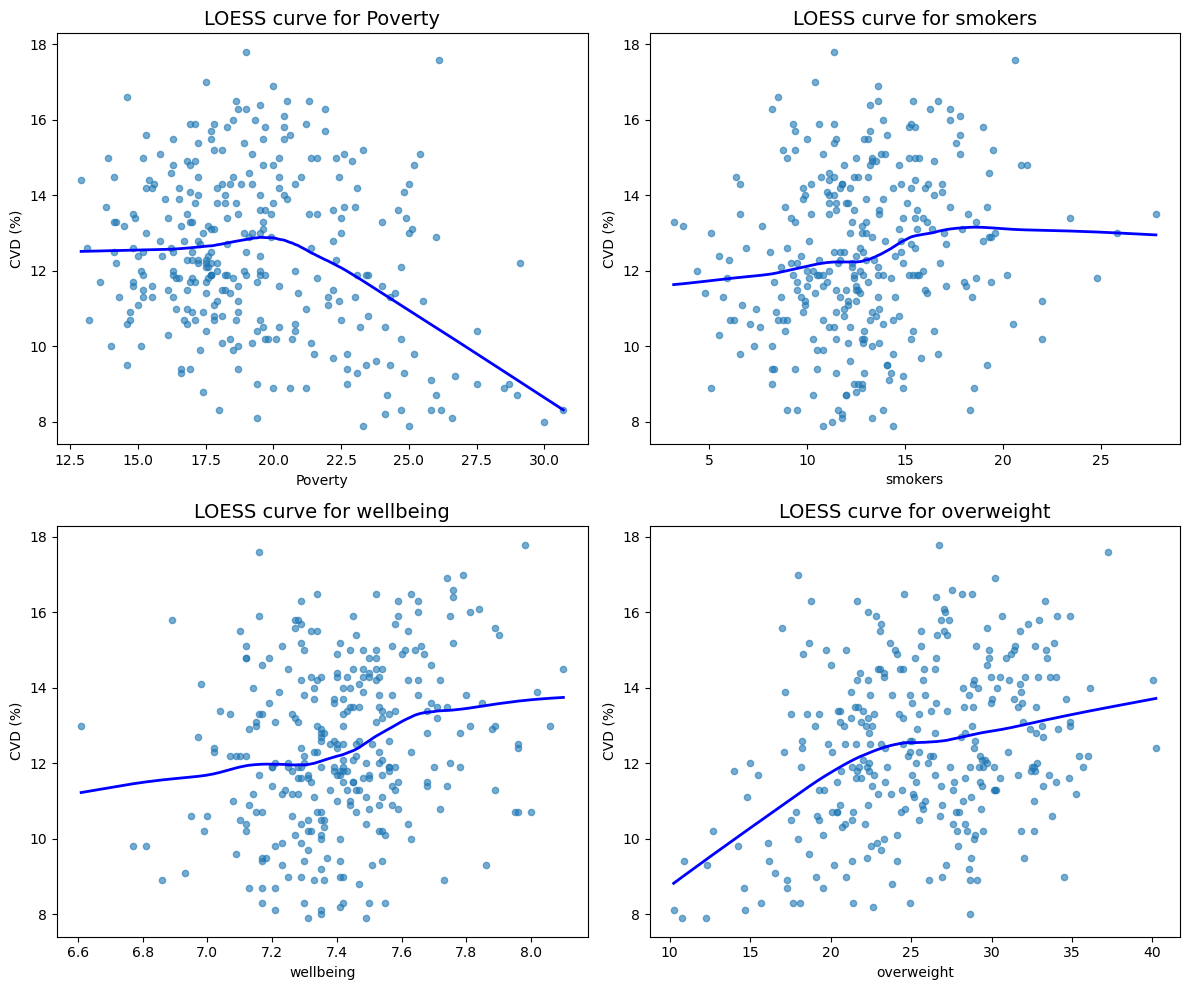

In [29]:

# Variables to check for non-linearity
variables_to_plot = ['Poverty', 'smokers', 'wellbeing', 'overweight']

plt.figure(figsize=(12, 10))
for i, var in enumerate(variables_to_plot):
    plt.subplot(2, 2, i + 1)
    # Fit LOESS curve to check non-linear patterns
    sns.regplot(data=df_cleaned, x=var, y='CVD', lowess=True, 
                scatter_kws={'alpha': 0.6, 's': 20},
                line_kws={'color': 'blue', 'lw': 2})
    plt.title(f"LOESS curve for {var}", fontsize=14)
    plt.xlabel(var)
    plt.ylabel("CVD (%)")

plt.tight_layout()
plt.show()

In [34]:
# --- Categorization ---
labels = ["Low", "Medium", "High"]

# Define bins (cut points from R code)
poverty_bins = [12.9, 17.0, 21.4, 30.7]
overweight_bins = [10.24, 21.63, 29.46, 40.22]
smokers_bins = [3.2, 10.5, 12.7, 27.8]
wellbeing_bins = [6.61, 7.28, 7.41, 8.1]

# Create categorical variables using pd.cut
df_cleaned['poverty_group'] = pd.cut(df_cleaned['Poverty'], bins=poverty_bins, labels=labels, right=True)
df_cleaned['overweight_group'] = pd.cut(df_cleaned['overweight'], bins=overweight_bins, labels=labels, right=True)
df_cleaned['smokers_group'] = pd.cut(df_cleaned['smokers'], bins=smokers_bins, labels=labels, right=True)
df_cleaned['wellbeing_group'] = pd.cut(df_cleaned['wellbeing'], bins=wellbeing_bins, labels=labels, right=True)

# --- Grouped MLR ---
# Fit MLR with categorical predictors
model_formula_grouped = 'CVD ~ poverty_group + smokers_group + wellbeing_group + overweight_group'
lm_cvd_grouped = sm.ols(formula=model_formula_grouped, data=df_cleaned).fit()

print("\n[Model Summary - Categorized Variables]")
print(lm_cvd_grouped.summary())

# VIF check function for the grouped model
def calculate_vif_for_model(model, data_frame): 
    from patsy import dmatrices
    
    y, X = dmatrices(model.model.formula, data_frame, return_type="dataframe") 
    
    vif = pd.DataFrame()
    vif["Feature"] = X.columns[1:] 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
    return vif
vif_grouped_results = calculate_vif_for_model(lm_cvd_grouped, df_cleaned) 
print("\n[VIF for Categorized Model]")
print(vif_grouped_results)


[Model Summary - Categorized Variables]
                            OLS Regression Results                            
Dep. Variable:                    CVD   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     10.54
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           5.11e-13
Time:                        18:26:56   Log-Likelihood:                -633.26
No. Observations:                 306   AIC:                             1285.
Df Residuals:                     297   BIC:                             1318.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

NHST: The multiple regression analysis showed that all variables (Poverty, Smokers, Wellbeing, and Overweight) were statistically significant predictors of CVD, with p-values ≤ 0.05. The F-value of 23.89 confirms the overall model's significance, providing strong evidence against the null hypothesis. With an R-squared of 0.24, the model explains only a small portion of the variance in CVD, and the low residual standard error suggests that there is room for improvement.



Estimation: Poverty is negatively associated with CVD (Estimate = -0.18, 95% CI: [-0.25, -0.11]), while Smokers (Estimate = 0.11, 95% CI: [0.043, 0.173]), Wellbeing (Estimate = 1.76, 95% CI: [0.79, 2.73]), and Overweight (Estimate = 0.11, 95% CI: [0.072, 0.154]) showed positive relationships. The intercept value does not play a significant role in this model (p = 0.724), indicating that the baseline value of CVD when all predictors are zero is not reliably different from zero. The independent variables contribute more significantly to explaining the dependent variable (CVD).



VIF: Poverty  33.789569, smokers  16.850264, wellbeing  40.242678, overweight  25.538212 (too high)


Overall, the regression model provides statistically significant insights into the relationships between the predictors and CVD. However, the low R-squared and residual error suggest that the model does not fully capture the complexities of CVD. To better analyze the impact of socio-analytical data, more independent variables and linear data are needed. The current dataset has limitations in creating meaningful models, and further refinement is necessary.



LOESS curve: Given the low R-squared value, we explored potential non-linear relationships in the data. LOESS curves were plotted to visualize these patterns, revealing that most relationships with CVD are not clearly linear. As a result, alternative non-linear regression methods were applied to model these relationships.



Multiple regression analysis using categorized variables: The multiple regression analysis using categorized variables resulted in an F-statistic of 10.58 with a p-value ≤ 0.05, indicating that the model is statistically significant. However, the R-squared value of 0.2195 and the Adjusted R-squared of 0.1988 suggest that adding more variables does not significantly improve the model. To improve the model's explanatory power for non-linear relationships, categorical data processing was attempted, but the R-squared and F-value remain low.



Conclusion: The low R-squared value indicates that the model has limited explanatory power and fails to account for a significant portion of the variance in CVD. While the relationships between the predictors and CVD are statistically significant, the model’s residual error and R-squared suggest that it does not fully capture the complexities of CVD. To enhance the model's explanatory power and predictive accuracy, further refinement is necessary, including exploring non-linear relationships and incorporating additional variables.


In [39]:
# fit the simple regression model
lm_cvd_proverty = sm.ols(formula='CVD ~ Poverty', data=df_cleaned).fit()
# Print summary, confidence intervals, and VIF
print("---  Linear Regression (LR) Summary ---")
print(lm_cvd_proverty.summary())

print("\n--- 95% Confidence Intervals ---")
print(lm_cvd_proverty.conf_int())

df_cleaned['CVD_pred'] = lm_cvd_proverty.predict(df_cleaned)
df_cleaned['residuals'] = lm_cvd_proverty.resid

---  Linear Regression (LR) Summary ---
                            OLS Regression Results                            
Dep. Variable:                    CVD   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     19.35
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.51e-05
Time:                        21:41:48   Log-Likelihood:                -667.66
No. Observations:                 309   AIC:                             1339.
Df Residuals:                     307   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

C:\Users\admin\AppData\Local\Temp\ipykernel_2564\2591475276.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


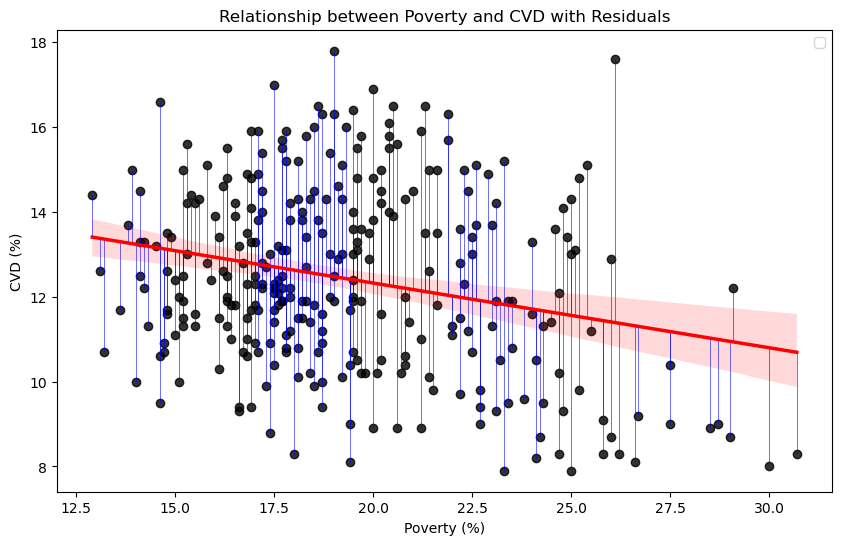

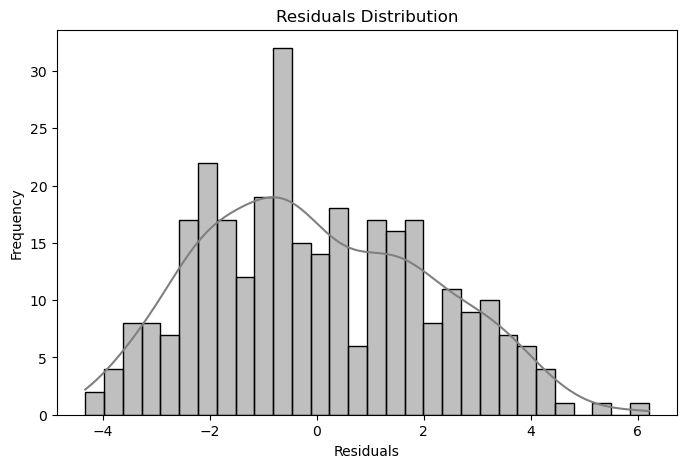

In [42]:
# Scatter plot with residuals
plt.figure(figsize=(10,6))

#Scatter plot of data points
plt.scatter(df_cleaned['Poverty'], df_cleaned['CVD'], color='black',alpha=0.8)

#vertical lines representing residuals
plt.vlines(df_cleaned['Poverty'], df_cleaned['CVD_pred'],df_cleaned['CVD'], color='blue', linewidth=0.5,alpha=0.8)
#add the linear regression line
sns.regplot(data=df_cleaned, x='Poverty', y='CVD', scatter=False, line_kws={'color':'red','lw' : 2.5,'label':'Linear Fit'})

plt.title("Relationship between Poverty and CVD with Residuals")
plt.xlabel("Poverty (%)")
plt.ylabel("CVD (%)")
plt.legend()
plt.show()

# B. Residuals Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['residuals'], bins=30, kde=True, color='gray')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_2564\2261719154.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cvd_preds_group = df_cleaned.groupby('poverty_group')['CVD'].mean().reset_index()


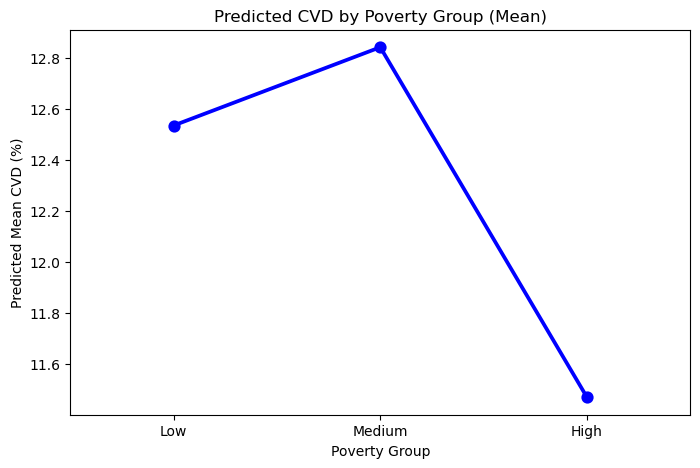

In [44]:
# --- Categorization ---
poverty_bins = [12.9, 17.0, 21.4, 30.7]
labels = ["Low", "Medium", "High"]
df_cleaned['poverty_group'] = pd.cut(df_cleaned['Poverty'], bins=poverty_bins, labels=labels, right=True)

# --- Grouped MLR ---
# Fit regression using the categorical poverty group
lm_cvd_poverty_grouped = sm.ols(formula='CVD ~ poverty_group', data=df_cleaned).fit()

# Get predicted means (Equivalent to R's emmeans)
# Create a DataFrame for predictions at each group level
mean_preds = lm_cvd_poverty_grouped.get_prediction().summary_frame(alpha=0.05)
# Calculate mean CVD for each group (Predicted Mean)
cvd_preds_group = df_cleaned.groupby('poverty_group')['CVD'].mean().reset_index()
cvd_preds_group.columns = ['poverty_group', 'emmean']

# --- Predicted Means Visualization ---
plt.figure(figsize=(8, 5))
sns.pointplot(data=cvd_preds_group, x='poverty_group', y='emmean', 
              color='blue', markers='o', linestyles='-', errorbar=None) 
plt.title("Predicted CVD by Poverty Group (Mean)")
plt.xlabel("Poverty Group")
plt.ylabel("Predicted Mean CVD (%)")
plt.show()

NHST: The p-value of less than 0.05 indicates a statistically significant relationship between poverty and CVD, with poverty having a meaningful impact on CVD. The coefficient suggests that for each unit increase in poverty, CVD decreases by 0.152%. The t-value of -4.427 further supports this significant relationship. The R-squared of 0.05928 shows that the model explains only 5.9% of the variability in CVD.



Estimation: The 95% confidence interval of [-0.220, -0.085] confirms the negative relationship. The Residual Standard Error (RSE) of 2.093 suggests that predictions are off by about 2.1%, though there is room for model improvement.



The relationship between poverty and CVD was initially visualized using a scatter plot and residual analysis, revealing discrepancies between observed and predicted values (RSE = 1.9). To address this, the Poverty variable was categorized into groups. The results showed a trend where areas with low poverty had a predicted CVD rate of 12.5%, medium poverty areas 12.8%, and high poverty areas 11.5%, suggesting that medium poverty rates are associated with higher predicted CVD rates.



These results suggest that CVD rates might be higher in medium poverty areas because welfare programs and facilities often focus on helping the poorest groups. At the same time, people in medium poverty areas may not have enough money to afford proper medical care, unlike those in higher-income areas. This makes it harder for them to get treatment and preventive care, leading to worse health outcomes.
